In [2]:
import pandas as pd
import px_reader as px
from helpers import *
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
staff = read_file('staff.px')
staff.index.names = ['annee', 'filiere','role']
staff.head()

BS  BE  FR  \
annee filiere       role                                                     
1994  1.1 Theologie Professeurs                                  9  13  27   
                    Autres enseignants                           9  14   9   
                    Assistants et collaborateurs scientifiques  13  22  57   
                    Direction, personnel admin-techn.            4   6  33   
                    Inconnu                                      0   0   0   

                                                                GE  LS LU  NE  \
annee filiere       role                                                        
1994  1.1 Theologie Professeurs                                 10  11  0   5   
                    Autres enseignants                           7  10  0   8   
                    Assistants et collaborateurs scientifiques  16  21  0  11   
                    Direction, personnel admin-techn.            5   2  0   4   
                    Inconnu                                      0   0  0   0   

                                                               SG UZH USI  \
annee filiere       role                                                    
1994  1.1 Theologie Professeurs                                 0  12   0   
                    Autres enseignants                          2  31   0   
                    Assistants et collaborateurs scientifiques  0  23   0   
                    Direction, personnel admin-techn.           0  15   0   
                    Inconnu                                     0   0   0   

                                                               FS-CH IUKB  \
annee filiere       role                                                    
1994  1.1 Theologie Professeurs                                    0    0   
                    Autres enseignants                             0    0   
                    Assistants et collaborateurs scientifiques     0    0   
                    Direction, personnel admin-techn.              0    0   
                    Inconnu                                        0    0   

                                                               EPFL ETHZ  
annee filiere       role                                                  
1994  1.1 Theologie Professeurs                                   0    0  
                    Autres enseignants                            0    0  
                    Assistants et collaborateurs scientifiques    0    0  
                    Direction, personnel admin-techn.             0    0  
                    Inconnu                                       0    0

In [4]:
type_filiere = list(staff.index.get_level_values('filiere').unique())
years = list(staff.index.get_level_values('annee').unique())
roles = list(staff.index.get_level_values('role').unique())

In [5]:
staff.columns

Index(['BS', 'BE', 'FR', 'GE', 'LS', 'LU', 'NE', 'SG', 'UZH', 'USI', 'FS-CH',
       'IUKB', 'EPFL', 'ETHZ'],
      dtype='object')

In [6]:
staff = parse_df(staff,0)

In [7]:
staff = staff.groupby(['annee', 'role']).sum()
staff.head()

BS      BE     FR  \
annee role                                                                
1994  Assistants et collaborateurs scientifiques  1391.0  1759.0  727.0   
      Autres enseignants                           431.0   451.0  428.0   
      Direction, personnel admin-techn.            723.0  1562.0  617.0   
      Inconnu                                        0.0     0.0    0.0   
      Professeurs                                  293.0   297.0  190.0   

                                                      GE      LS   LU     NE  \
annee role                                                                     
1994  Assistants et collaborateurs scientifiques  1481.0  1107.0  0.0  563.0   
      Autres enseignants                           805.0   332.0  0.0  175.0   
      Direction, personnel admin-techn.           1628.0   564.0  0.0  249.0   
      Inconnu                                        0.0     0.0  0.0    0.0   
      Professeurs                                  401.0   330.0  0.0  111.0   

                                                     SG     UZH  USI  FS-CH  \
annee role                                                                    
1994  Assistants et collaborateurs scientifiques  395.0  1518.0  0.0    0.0   
      Autres enseignants                          160.0  1714.0  0.0    0.0   
      Direction, personnel admin-techn.           204.0  2007.0  0.0    0.0   
      Inconnu                                       0.0   850.0  0.0    0.0   
      Professeurs                                  76.0   383.0  0.0    0.0   

                                                  IUKB    EPFL    ETHZ  
annee role                                                              
1994  Assistants et collaborateurs scientifiques   0.0  1592.0  4687.0  
      Autres enseignants                           0.0    34.0   442.0  
      Direction, personnel admin-techn.            0.0   753.0  2528.0  
      Inconnu                                      0.0     0.0     0.0  
      Professeurs                                  0.0   153.0   337.0

In [9]:
def get_df_for_uni(uni, summarized = False):
    uni_df = pd.DataFrame(columns = roles)
    uni_df.insert(loc=0, column='annee', value=years)
    uni_df = uni_df.set_index('annee')
    
    tmp_df = staff[[uni]]
    for y in years:
        uni_df.loc[y] = list(tmp_df.xs(y, level = 'annee').reset_index()[uni])
    
    uni_df['Total'] = uni_df[uni_df.columns].sum(axis = 1)
    return uni_df

In [10]:
get_df_for_uni('EPFL').head()

,Professeurs,Autres enseignants,Assistants et collaborateurs scientifiques,"Direction, personnel admin-techn.",Inconnu,Total
annee,,,,,,
1994,1592,34,753,0,153,2532
1995,1591,36,753,0,153,2533
1996,1707,44,786,0,154,2691
1997,1814,49,834,0,163,2860
1998,1844,69,854,0,167,2934


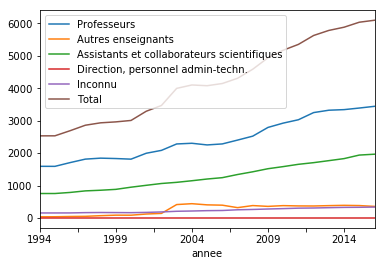

In [11]:
tmp_df = get_df_for_uni('EPFL')
tmp_df.plot(kind = 'line', logy = False)